## Q4) a, b, c
Plotting dataset for y=mx+c+random_noise and polynomial fitting 


shivji.bhagat@iitgn.ac.in 16110149

In [1]:
import random
from matplotlib import pyplot as plt
import numpy as np
#refernece: https://www.numpy.org/devdocs/reference/generated/numpy.linspace.html
#reference: https://www.scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html

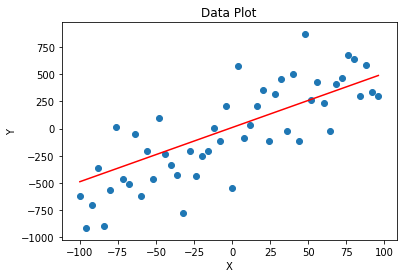

In [2]:
def lineF(m,x,c):
    return m*x+c
def create_dataset(m=5,c=10):
    X=list(range(-100,100,4))
    ch=range(-500,500)
    Y=[]
    Y1=[]

    for i in range(50):
        #y=m*X[i]+c
        y=lineF(m,X[i],c)
        Y.append(y)
        y_=y+random.choice([0.7,0.9,1.5])*random.choice(ch)    #adding random noise by multiplying random float and int nos
        Y1.append(y_)
    return [X,Y1,Y]
[X,Y1,Y]=create_dataset()
x=X
y1=Y1
y=Y
#plt.scatter(x,y1,'b')
plt.plot(x,y,'r')
plt.scatter(x,y1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Plot")
plt.show()



Variance:  58624.95792893731


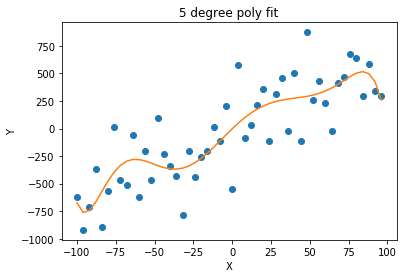

In [3]:
x = X
y = Y1
p = np.poly1d(np.polyfit(x, y, 10))  #5 deg polynomial fitting of the data

#t = np.linspace(x[0],x[-1],100)     #returns evenly spaced 500 numbers in the range x[0], x[-1]
t=X

V=0
for i in range(len(X)):
    V+=(Y1[i]-p(X[i]))**2
V=V/len(X)
print("Variance: ", V)

Z=p(t)


plt.plot(x, y, 'o', t, p(t), '-')  #p(t) returns the values of polynomial function corresponding to values of t
plt.xlabel("X")
plt.ylabel("Y")
plt.title("5 degree poly fit")
plt.show()

## 4.c) Bagging of 100 rounds 

Variance:  63179.477008041926


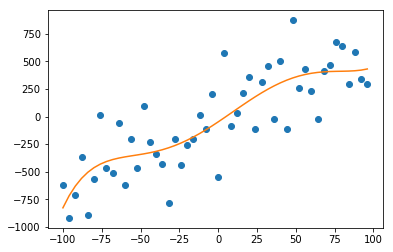

In [4]:
P=[]
#t=np.linspace(X[0],X[-1],100)                   #X-values for the all polynomial function
t=X
for i in range(100):
    X__=[]
    Y__=[]
    X__=np.random.choice(X,40,replace=False)    #sampling n unique points at random from dataset for bagging
    for _ in X__:
        Y__.append(Y1[X.index(_)])
    p_=np.poly1d(np.polyfit(X__,Y__,5))         #5 deg polynomial for the current round of bagging set
    P.append(p_(t))                             #the Y-values for the polynomial

P=np.array(P)

P_av=sum(P)/len(P)

#variance
V=0
for i in range(len(X)):
    V+=(Y1[i]-P_av[i])**2
V=V/len(X)
print("Variance: ", V)

plt.plot(X, Y1, 'o', t, P_av, '-')  #p(t) returns the values of polynomial function corresponding to values of t
plt.show()


In [5]:
sum(P)/len(P)-P_av

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])